<a href="https://colab.research.google.com/github/jhorvi24/edgeAI-helloWorld/blob/main/edgeESP32_hello_world.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importar librerias

import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
import math


In [2]:
SAMPLES = 1000
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED) #Garantizar la generación de los mismos números aleatorios.



<function matplotlib.pyplot.show(close=None, block=None)>

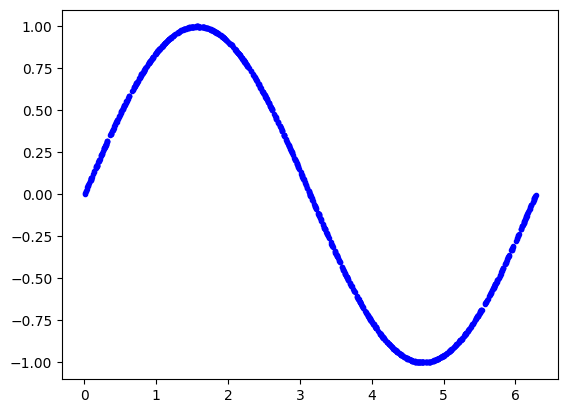

In [3]:

x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES) #Generación de número aleatorios uniformes
np.random.shuffle(x_values) # Mezcla los números generados anteriormente en un orden diferente
y_values = np.sin(x_values) # Obtiene el seno de cada valor de x
plt.plot(x_values, y_values, 'b.')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

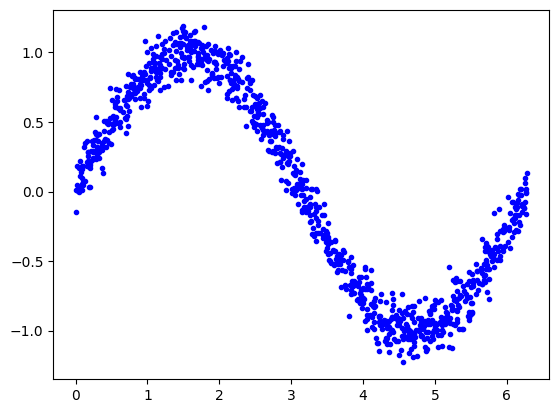

In [4]:
y_values += 0.1 * np.random.randn(*y_values.shape) #Anañe ruidos a los valores generados anteriormente
plt.plot(x_values, y_values, 'b.')
plt.show

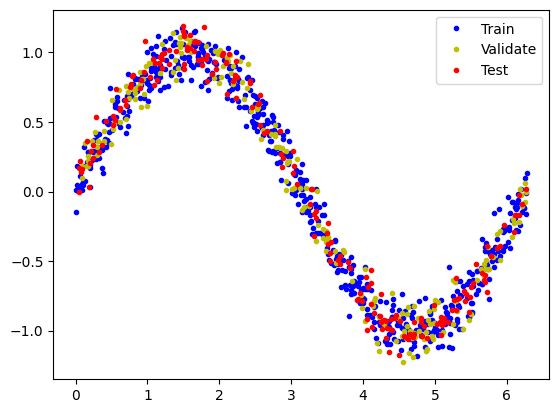

In [5]:
#Divide los datos en entrenamiento, validación y prueba

TRAIN_SPLIT = int(0.6 * SAMPLES)  #60% para entrenar el modelo. 20% para validación y 20% para prueba
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT) #

x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT]) #Divide los datos para X
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT]) # Divide los datos para y

assert (x_train.size + x_validate.size + x_test.size) == SAMPLES #Verifica si la división se realizó correctamente

#Graficas los datos
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.legend()
plt.show()

In [6]:
#Implementación de la red neuronal
model_1 = tf.keras.Sequential()


In [7]:
from tensorflow.keras import layers
model_1 = tf.keras.Sequential()
model_1.add(layers.Dense(16, activation='relu', input_shape=(1,))) #1 capa de entrada (1 entrada)
model_1.add(layers.Dense(1)) # 1 capa de salida
model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) #Compilación del modelo.
model_1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49 (196.00 B)

 Trainable params: 49 (196.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
#Entrenamiento del modelo
history_1 = model_1.fit(x_train, y_train, epochs=500, batch_size=16, validation_data=(x_validate, y_validate))

Epoch 1/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1523 - mae: 0.3106 - val_loss: 0.1588 - val_mae: 0.3174
Epoch 2/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1523 - mae: 0.3106 - val_loss: 0.1588 - val_mae: 0.3174
Epoch 3/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1523 - mae: 0.3105 - val_loss: 0.1588 - val_mae: 0.3174
Epoch 4/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1523 - mae: 0.3105 - val_loss: 0.1588 - val_mae: 0.3173
Epoch 5/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1523 - mae: 0.3105 - val_loss: 0.1588 - val_mae: 0.3173
Epoch 6/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1523 - mae: 0.3104 - val_loss: 0.1588 - val_mae: 0.3172
Epoch 7/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1523 - mae: 0.3104 - val_loss: 0.1588 - val_mae: 0.3172
Epoch 8/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1523 - mae: 0.3104 - val_loss: 0.1588 - val_mae: 0.3172
Epoch 9/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.15

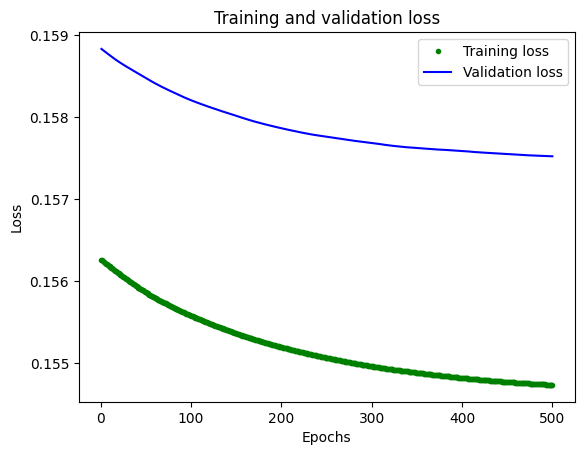

In [12]:
#Vamos a analizar los valores de pérdida en entrenamiento y validación

loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

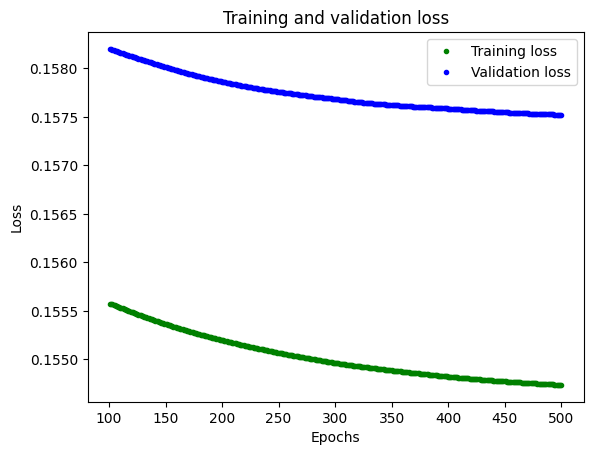

In [13]:
#Determinar las pérdidas a partir de la epochs=100

SKIP = 100
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

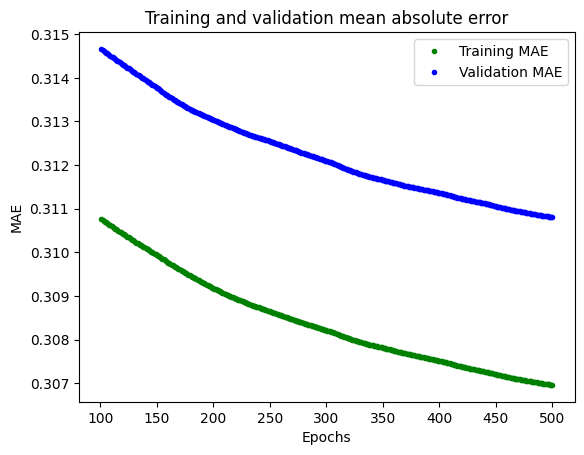

In [14]:
#Obtiene los valores de MAE (Error Absoluto medio) para entrenamiento y validación

mae = history_1.history['mae']
val_mae = history_1.history['val_mae']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


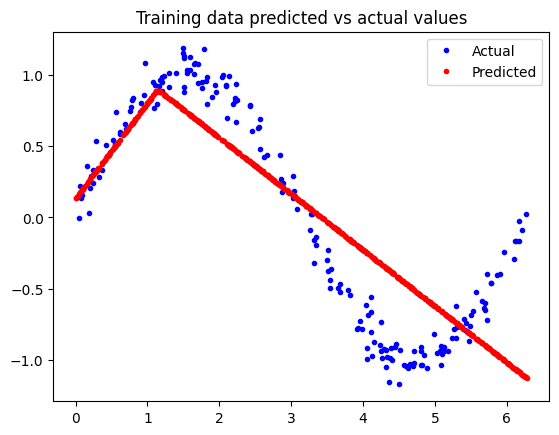

In [15]:
#Realizar una predicción sobre los datos de entrenamiento para validar el modelo.

predictions = model_1.predict(x_train)

plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_train, predictions, 'r.', label='Predicted')
plt.legend()
plt.show() #Con la gráfica confirmamos que el no tiene suficiente capacidad para aprender.

In [18]:
#Creación de un segundo modelo

model_2 = tf.keras.Sequential()
model_2.add(layers.Dense(16, activation='relu', input_shape=(1,))) #Una capa de entrada
model_2.add(layers.Dense(16, activation='relu')) # Capa intermedia
model_2.add(layers.Dense(1)) #Capa de salida
model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model_2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Entrenamiento del segundo modelo

history_2 = model_2.fit(x_train, y_train, epochs=600, batch_size=16, validation_data=(x_validate, y_validate))

Epoch 1/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.3977 - mae: 0.5469 - val_loss: 0.3722 - val_mae: 0.5277
Epoch 2/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3351 - mae: 0.5026 - val_loss: 0.3147 - val_mae: 0.4824
Epoch 3/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2843 - mae: 0.4639 - val_loss: 0.2651 - val_mae: 0.4423
Epoch 4/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2414 - mae: 0.4283 - val_loss: 0.2266 - val_mae: 0.4089
Epoch 5/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2088 - mae: 0.3991 - val_loss: 0.1996 - val_mae: 0.3833
Epoch 6/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1869 - mae: 0.3757 - val_loss: 0.1825 - val_mae: 0.3652
Epoch 7/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1735 - mae: 0.3584 - val_loss: 0.1722 - val_mae: 0.3531
Epoch 8/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1654 - mae: 0.3454 - val_loss: 0.1656 - val_mae: 0.3438
Epoch 9/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.160

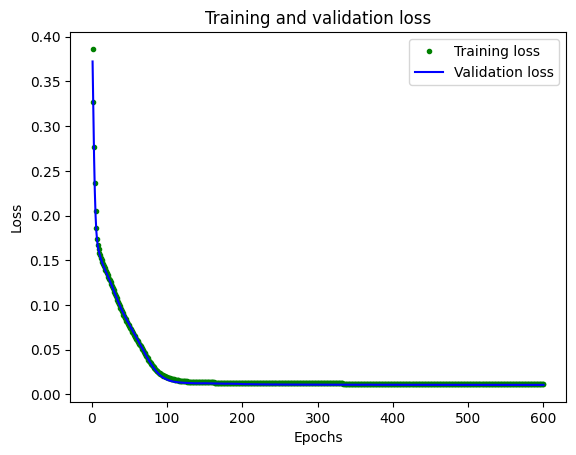

In [20]:
#Vamos a analizar los valores de pérdida en entrenamiento y validación

loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

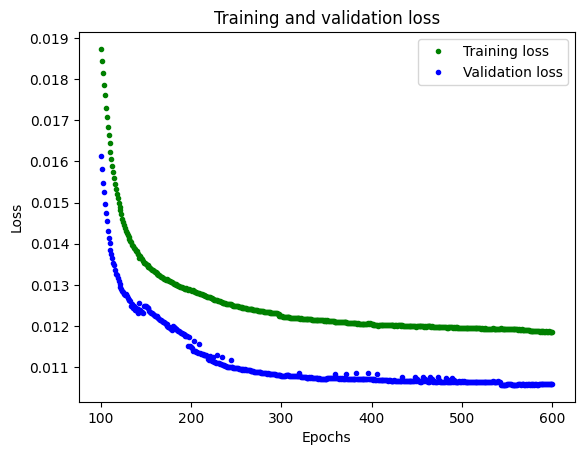

In [22]:
#Determinar las pérdidas a partir de la epochos=100

SKIP = 100
plt.clf()
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

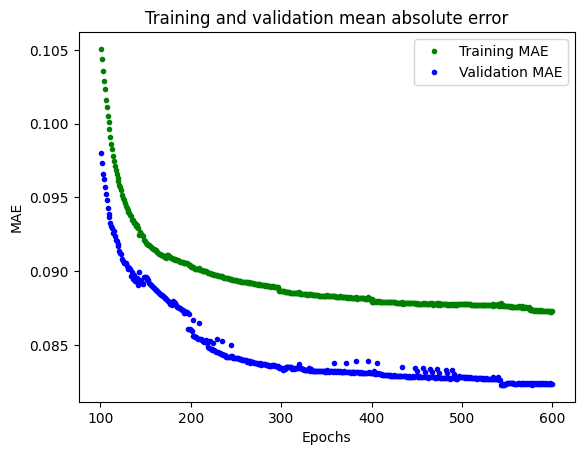

In [24]:
#Obtiene los valores de MAE (Error Absoluto medio) para entrenamiento y validación

plt.clf()
mae = history_2.history['mae']
val_mae = history_2.history['val_mae']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mae: 0.0719 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


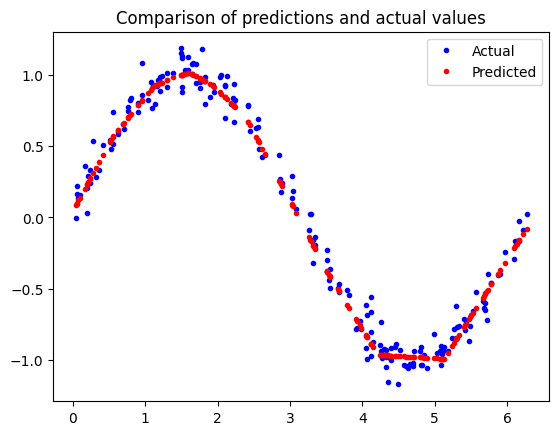

In [25]:
#Probar el modelo

loss = model_2.evaluate(x_test, y_test)

#Realizar una predicción

predictions = model_2.predict(x_test)

#Graficar

plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

In [26]:
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)

tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

Saved artifact at '/tmp/tmp19hvuum4'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_4')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  137543491540304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137543491544528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137543491540880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137543491542032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137543491541840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137543491546256: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
#Convertir el modelo TensorFlow Lite con Cuantización (Se disminuyen el tamaño de los pesos a 8 bits)

converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_quant_model = converter.convert()

with open ('model_quant.tflite', 'wb') as f:
  f.write(tflite_quant_model)

In [28]:
!xxd -i model_quant.tflite > sine.h